In [ ]:
#sentiment analysis works on sequence data

In [ ]:
#tanh activation function: -1 to +1  : RNN hidden layer insted of relu we use tanH 
#threshold: 0
#output layer: sigmoid.. s curve same 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
import nltk
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import tensorflow as tf

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ItVedantPythonAWPClasswork/NLP/review.csv")

In [ ]:
df.head() #0 means -ve 1 means +ve

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
#drop/delete unwanted column from dataset permanently 
df.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
df.head()

,review,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
#to check null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
#to check datatype
df.dtypes

review       object
sentiment     int64
dtype: object

In [ ]:
#to check rows and columns 
df.shape
#no need to check duplicates as the reviwes can be same 

(999, 2)

In [ ]:
#how many category in sentimens category
df['sentiment'].value_counts()

1    500
0    499
Name: sentiment, dtype: int64

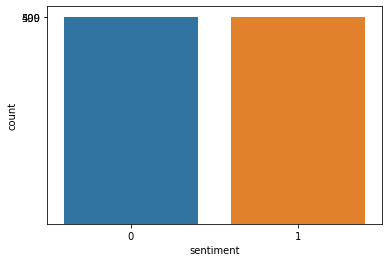

In [ ]:
#visualise from:
sns.countplot(data=df,x='sentiment')
f=df['sentiment'].value_counts()
plt.yticks(f)
plt.show()

In [ ]:
#Positive review means sentiment =1
#negaitive review means sentiment =0
#create wordcloud : it is a image
from wordcloud import WordCloud

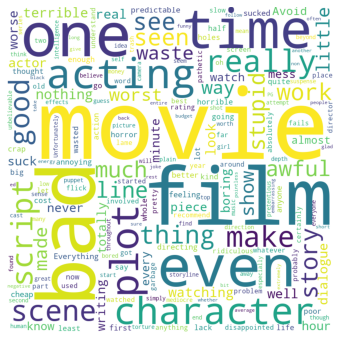

In [ ]:
#create WordCloud for -ve rewive means bad review
#first create an object of WordCloud class
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(' '.join(df[df['sentiment']==0]['review']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

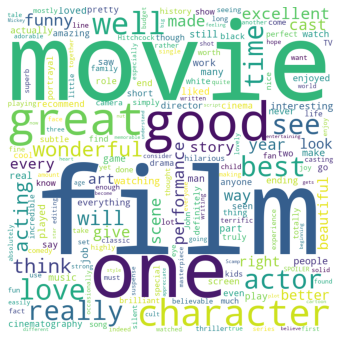

In [ ]:
#create WordCloud for -ve rewive means bad review
#first create an object of WordCloud class
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(' '.join(df[df['sentiment']==1]['review']))

plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
#create a use define function for cleaning the msg or text means 
#text preprocessing means text mining
def clean_text(text):
  #first convert in lower case
  text=text.lower()
  #print(text)
  #second 
  #next step,apply word_tokenize on given text
  tokens=word_tokenize(text)
  #keeps alphabets only and remove special charecters and digits 
  #next step : filtering only alphabets from given tokens, use
  #inbuilt function isalpha() means only accept alphabets 
  #and remove all numbers and all special charecter from given msg
  word_tokens=[w for w in tokens if w.isalpha()]
  #to remove stopwords from given msg
  #create an object of stopwords class
  stop=stopwords.words('english')
  clean_tokens=[w for w in word_tokens if w not in stop]
  #print(clean_tokens)
  #next apply lemmetization of clean_token list
  #create ovject of WordNetLemmatizer
  lemma=WordNetLemmatizer()
  lemma_tokens=[lemma.lemmatize(w) for w in clean_tokens]
  #return lemma_tokens (just for explaning)
  return ' '.join(lemma_tokens)


In [ ]:
#call funcation in main Apply works as map function (Python inbuilt function)
df['review']=df['review'].apply(clean_text) #Apply python inbuilt function

In [ ]:
df.head()

,review,sentiment
0,sure lost flat character audience nearly half ...,0
1,attempting artiness black white clever camera ...,0
2,little music anything speak,0
3,best scene movie gerardo trying find song keep...,1
4,rest movie lack art charm meaning emptiness wo...,0


In [ ]:
#select input and features and output from dataset
X=df['review'] #input
Y=df['sentiment'] #output target to predict 

In [ ]:
X.head()

0    sure lost flat character audience nearly half ...
1    attempting artiness black white clever camera ...
2                          little music anything speak
3    best scene movie gerardo trying find song keep...
4    rest movie lack art charm meaning emptiness wo...
Name: review, dtype: object

In [ ]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: sentiment, dtype: int64

In [ ]:
#split data in to 80% 20%
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
X_train.head()

382    set especially designed work camera amazing st...
904                 one boring pointless movie ever seen
981                                       sad movie good
47             whatever cost much translate quality sure
521    rating grade z note show bad even mother cast ...
Name: review, dtype: object

In [ ]:
X_train.shape

(799,)

In [ ]:
Y_train.head()

382    1
904    0
981    1
47     0
521    0
Name: sentiment, dtype: int64

In [ ]:
len(X_train[0])

52

In [ ]:
#to find the no. of words in given review in dataset
#first intalize empty list
sent_len=[]
for sent in df['review']:
  sent_len.append(len(word_tokenize(sent))) 

#to add new column sentence_length on existing dataset df
df['sentence_length']=sent_len
df.head()


#add length of words of each msg on sent_len list
#---explained for loop----
#w=word_tokenize("set especially designed work camera amazing")
#print(w)
#print(len(w))


,review,sentiment,sentence_length
0,sure lost flat character audience nearly half ...,0,8
1,attempting artiness black white clever camera ...,0,17
2,little music anything speak,0,4
3,best scene movie gerardo trying find song keep...,1,10
4,rest movie lack art charm meaning emptiness wo...,0,10


In [ ]:
#find the maximum length 
#we take this 38 as no of hidden layers in RNN
max(df['sentence_length'])

38

In [ ]:
df['sentence_length'].value_counts()

5     126
3     108
4     104
2      94
7      82
6      74
8      62
9      62
1      39
11     38
10     38
12     38
14     25
13     24
15     14
16     12
17     10
21      8
19      8
18      7
20      5
24      3
26      3
0       3
23      2
28      2
22      2
36      1
33      1
31      1
27      1
38      1
25      1
Name: sentence_length, dtype: int64

In [ ]:
np.quantile(df['sentence_length'],0.95)
# taken sentence only 95% and 5% secrify

17.0

In [ ]:
#we can see that 95% review text are of length less than or equal to 17.
#we will keep the max length to 17.
max_len=17


In [ ]:
#tokenization , keras level
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
#create object of tokenizer class
tok=Tokenizer(char_level=False,split=' ') #bydefaulty it takes char_level 
#we made it word level
tok.fit_on_texts(X_train)
#fit_on_texts, inbuilt method of tokenizer class


In [ ]:
#to see unique id of each word, ibuilt attributes index_word
#of tokenizer
tok.index_word

{1: 'movie',
 2: 'film',
 3: 'one',
 4: 'bad',
 5: 'character',
 6: 'good',
 7: 'like',
 8: 'time',
 9: 'even',
 10: 'acting',
 11: 'really',
 12: 'great',
 13: 'well',
 14: 'scene',
 15: 'see',
 16: 'story',
 17: 'make',
 18: 'actor',
 19: 'best',
 20: 'work',
 21: 'made',
 22: 'could',
 23: 'plot',
 24: 'think',
 25: 'thing',
 26: 'look',
 27: 'ever',
 28: 'seen',
 29: 'script',
 30: 'love',
 31: 'better',
 32: 'way',
 33: 'wonderful',
 34: 'would',
 35: 'year',
 36: 'real',
 37: 'also',
 38: 'much',
 39: 'watch',
 40: 'watching',
 41: 'line',
 42: 'performance',
 43: 'part',
 44: 'never',
 45: 'excellent',
 46: 'stupid',
 47: 'show',
 48: 'cast',
 49: 'life',
 50: 'anyone',
 51: 'little',
 52: 'go',
 53: 'nothing',
 54: 'get',
 55: 'every',
 56: 'know',
 57: 'give',
 58: 'people',
 59: 'two',
 60: 'music',
 61: 'recommend',
 62: 'funny',
 63: 'say',
 64: 'pretty',
 65: 'dialogue',
 66: 'art',
 67: 'saw',
 68: 'waste',
 69: 'awful',
 70: 'terrible',
 71: 'man',
 72: 'many',
 73: 'lot

In [ ]:
len(tok.index_word)

2269

In [ ]:
X_train.head()

382    set especially designed work camera amazing st...
904                 one boring pointless movie ever seen
981                                       sad movie good
47             whatever cost much translate quality sure
521    rating grade z note show bad even mother cast ...
Name: review, dtype: object

In [ ]:
sequence_train=tok.texts_to_sequences(X_train)
#text_to_sequences inbuilt method of tokenizer class classed by tok 

In [ ]:
#sequence_train

In [ ]:
X_train.shape

(799,)

In [ ]:
max_len #17 rnn

17

In [ ]:
from tensorflow.keras.preprocessing import sequence

In [ ]:
sequence_matrix_train=sequence.pad_sequences(sequence_train,maxlen=max_len)

In [ ]:
sequence_matrix_train

array([[  0,   0,   0, ..., 826,  74, 313],
       [  0,   0,   0, ...,   1,  27,  28],
       [  0,   0,   0, ..., 827,   1,   6],
       ...,
       [  0,   0,   0, ...,   9,  36,   1],
       [  0,   0,   0, ...,  65,  22,  52],
       [  0,   0,   0, ...,   0, 421, 770]], dtype=int32)

In [ ]:
#access first sentence
sequence_matrix_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0, 181, 121, 825,  20, 122,
       105, 826,  74, 313], dtype=int32)

In [ ]:
#access second sentence
sequence_matrix_train[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3, 106,
       314,   1,  27,  28], dtype=int32)

In [ ]:
#access third sentence
sequence_matrix_train[2]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 827,   1,   6], dtype=int32)

In [ ]:
#now we create a Sequential model means goes to neuron nw
#to train the model 
from tensorflow.keras.models import Sequential

In [ ]:
#create an object of Sequential model class
model=Sequential()

In [ ]:
vocab_len=len(tok.index_word)
vocab_len

2269

In [ ]:
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Dropout
#from tensorflow.keras.layers import Bidirectional
#RNN recurrent neural network #activation function: tanH
#embding unique vector me change krega... ek special type ka vector 
#to add layer in object of sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter passing the length of output #500 is for output length 
#mask_zero= no time consume on zero padding
model.add(SimpleRNN(units=64,activation='tanh'))
#tanH = tangent hyperbolic activation function use in RNN (sequence type)
model.add(Dense(units=64,activation='relu')) #add hidden layer 
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid')) #add output layer 

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#create a procedure for callback(Earlystopping)
#Early Stopping : 
#EarlyStopping : for decide epoch
#create a procedure for callback 
from tensorflow.keras.callbacks import EarlyStopping             
#create callback : -
#EarlyStopping() inbuilt function
cb=EarlyStopping(
    monitor="val_loss",  #val_loss means testing error
    min_delta=0.00001, #value of lambda 
    patience=20,
    verbose=1,
    mode="auto", #min loss 
    baseline=None,
    restore_best_weights=False
)

In [ ]:
sequence_matrix_train

array([[  0,   0,   0, ..., 826,  74, 313],
       [  0,   0,   0, ...,   1,  27,  28],
       [  0,   0,   0, ..., 827,   1,   6],
       ...,
       [  0,   0,   0, ...,   9,  36,   1],
       [  0,   0,   0, ...,  65,  22,  52],
       [  0,   0,   0, ...,   0, 421, 770]], dtype=int32)

In [ ]:
Y_train

382    1
904    0
981    1
47     0
521    0
      ..
767    1
72     1
908    0
235    0
37     1
Name: sentiment, Length: 799, dtype: int64

In [ ]:
#train the model 
trained_model=model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
                        validation_split=0.2,callbacks=cb)


Epoch 1/1000
13/13 [==============================] - 7s 216ms/step - loss: 0.6877 - accuracy: 0.5728 - val_loss: 0.6749 - val_accuracy: 0.6062
Epoch 2/1000
13/13 [==============================] - 1s 102ms/step - loss: 0.4752 - accuracy: 0.9531 - val_loss: 0.6168 - val_accuracy: 0.6938
Epoch 3/1000
13/13 [==============================] - 1s 85ms/step - loss: 0.1962 - accuracy: 0.9812 - val_loss: 0.8381 - val_accuracy: 0.6938
Epoch 4/1000
13/13 [==============================] - 1s 81ms/step - loss: 0.0733 - accuracy: 0.9859 - val_loss: 1.1347 - val_accuracy: 0.6687
Epoch 5/1000
13/13 [==============================] - 1s 95ms/step - loss: 0.0324 - accuracy: 0.9922 - val_loss: 1.4140 - val_accuracy: 0.6375
Epoch 6/1000
13/13 [==============================] - 1s 86ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 1.5329 - val_accuracy: 0.6375
Epoch 7/1000
13/13 [==============================] - 1s 101ms/step - loss: 0.0135 - accuracy: 0.9937 - val_loss: 1.6173 - val_accuracy: 0.6

In [ ]:
X_test

507                          film lack convincing script
608                also enough hypocrisy film make vomit
452                                 even good camp value
368    make scared horrified make sympathetic towards...
242    film great actor master director significant t...
                             ...                        
430    filmmaker director would hide head sand spent ...
587    even woman finally show sign improvement expec...
550                               may bad film ever made
607                            accent absolutely abysmal
207    another thing really like character got punche...
Name: review, Length: 200, dtype: object

In [ ]:
#Sequence apply on testing data
sequence_test=tok.texts_to_sequences(X_test)
#add padding sequence 
sequence_matrix_test=sequence.pad_sequences(sequence_test,maxlen=max_len)

In [ ]:
sequence_matrix_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         2, 185, 378,  29], dtype=int32)

In [ ]:
sequence_matrix_test[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        37, 119,   2,  17], dtype=int32)

In [ ]:
#test the model with 30% data
Y_pred=model.predict(sequence_matrix_test).round(2)

In [ ]:
Y_pred

array([[0.01],
       [1.  ],
       [0.02],
       [0.  ],
       [0.  ],
       [0.99],
       [0.01],
       [0.98],
       [1.  ],
       [0.75],
       [1.  ],
       [0.  ],
       [0.03],
       [0.98],
       [0.96],
       [0.02],
       [0.64],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.99],
       [1.  ],
       [0.55],
       [1.  ],
       [0.01],
       [0.99],
       [0.05],
       [1.  ],
       [0.01],
       [0.72],
       [0.98],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.51],
       [0.  ],
       [0.99],
       [0.89],
       [0.  ],
       [0.  ],
       [0.03],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.01],
       [0.93],
       [0.01],
       [0.08],
       [0.96],
       [0.  ],
       [0.97],
       [0.  ],
       [0.97],
       [0.02],
       [1.  ],
       [0.07],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.01],
       [1.  ],
       [1.  ],
       [0.01],
       [0.

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.62      0.66       102
           1       0.65      0.74      0.70        98

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200

[[63 39]
 [25 73]]


In [ ]:
#Bidirectional RNN
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense,Dropout
from tensorflow.keras.layers import Bidirectional
#RNN recurrent neural network #activation function: tanH
#embding unique vector me change krega... ek special type ka vector 
#to add layer in object of sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter passing the length of output #500 is for output length 
#mask_zero= no time consume on zero padding
model.add(Bidirectional(SimpleRNN(units=64,activation='tanh'))) #Bidirectional
#tanH = tangent hyperbolic activation function use in RNN (sequence type)
model.add(Dense(units=64,activation='relu')) #add hidden layer 
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid')) #add output layer 

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model 
trained_model=model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
                        validation_split=0.2,callbacks=cb)


Epoch 1/1000


13/13 [==============================] - 5s 100ms/step - loss: 0.6414 - accuracy: 0.6369 - val_loss: 0.6922 - val_accuracy: 0.5312
Epoch 2/1000
13/13 [==============================] - 1s 40ms/step - loss: 0.5765 - accuracy: 0.6573 - val_loss: 0.6883 - val_accuracy: 0.5312
Epoch 3/1000
13/13 [==============================] - 1s 41ms/step - loss: 0.5720 - accuracy: 0.6526 - val_loss: 0.6896 - val_accuracy: 0.5312
Epoch 4/1000
13/13 [==============================] - 0s 39ms/step - loss: 0.5644 - accuracy: 0.6541 - val_loss: 0.6999 - val_accuracy: 0.5312
Epoch 5/1000
13/13 [==============================] - 1s 42ms/step - loss: 0.5743 - accuracy: 0.6495 - val_loss: 0.6908 - val_accuracy: 0.5312
Epoch 6/1000
13/13 [==============================] - 0s 37ms/step - loss: 0.5713 - accuracy: 0.6541 - val_loss: 0.6890 - val_accuracy: 0.5312
Epoch 7/1000
13/13 [==============================] - 1s 42ms/step - loss: 0.5643 - accuracy: 0.6604 - val_loss: 0.6921 - val_accuracy: 0.5312
Epoch 8/100

In [ ]:
#test the model with 30% data
Y_pred=model.predict(sequence_matrix_test).round(2)
Y_pred

array([[0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.44],
       [0.

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       102
           1       0.00      0.00      0.00        98

    accuracy                           0.51       200
   macro avg       0.26      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200

[[102   0]
 [ 98   0]]


In [ ]:
#Limitation of RNN Vaneshing gradient descent problem : 
#   weight (gradent) of input : more reduce 

#Exploding gradient descent : Limitation of RNN :
#   weight of input : very high

#LSTM came into picture to remove this problem
#long short term memory 
#there are 3 types of gates 

#input gate(input modulation gate)
#forget gate  (keywords save) sigmoid,tanH in here ...save yes or not save 

#output gate 

#internal cell memory 

In [ ]:
#LSTM : long short term memory 

from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
#create object of sequential class
model=Sequential()

#from tensorflow.keras.layers import Bidirectional
#RNN recurrent neural network #activation function: tanH
#embding unique vector me change krega... ek special type ka vector 
#to add layer in object of sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter passing the length of output #500 is for output length 
#mask_zero= no time consume on zero padding
model.add(LSTM(units=64,activation='tanh')) #LSTM
#tanH = tangent hyperbolic activation function use in RNN (sequence type)
model.add(Dense(units=64,activation='relu')) #add hidden layer 
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid')) #add output layer 

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model 
trained_model=model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
                        validation_split=0.2,callbacks=cb)


Epoch 1/1000
13/13 [==============================] - 17s 234ms/step - loss: 0.6909 - accuracy: 0.5540 - val_loss: 0.6853 - val_accuracy: 0.6750
Epoch 2/1000
13/13 [==============================] - 1s 87ms/step - loss: 0.6485 - accuracy: 0.8545 - val_loss: 0.6339 - val_accuracy: 0.7188
Epoch 3/1000
13/13 [==============================] - 1s 86ms/step - loss: 0.4407 - accuracy: 0.9327 - val_loss: 0.4797 - val_accuracy: 0.8188
Epoch 4/1000
13/13 [==============================] - 1s 86ms/step - loss: 0.1688 - accuracy: 0.9624 - val_loss: 0.5523 - val_accuracy: 0.7875
Epoch 5/1000
13/13 [==============================] - 1s 85ms/step - loss: 0.0689 - accuracy: 0.9828 - val_loss: 0.7742 - val_accuracy: 0.7750
Epoch 6/1000
13/13 [==============================] - 1s 82ms/step - loss: 0.0303 - accuracy: 0.9906 - val_loss: 0.9175 - val_accuracy: 0.7812
Epoch 7/1000
13/13 [==============================] - 1s 83ms/step - loss: 0.0179 - accuracy: 0.9984 - val_loss: 1.1137 - val_accuracy: 0.76

In [ ]:
#test the model with 30% data
Y_pred=model.predict(sequence_matrix_test).round(2)
Y_pred

array([[0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.89],
       [0.  ],
       [0.97],
       [0.01],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.11],
       [0.06],
       [0.  ],
       [1.  ],
       [0.99],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.06],
       [1.  ],
       [0.04],
       [1.  ],
       [0.01],
       [1.  ],
       [0.  ],
       [0.15],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.  ],
       [0.98],
       [0.85],
       [0.02],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.99],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.99],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.01],
       [0.

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       102
           1       0.72      0.77      0.74        98

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200

[[73 29]
 [23 75]]


In [ ]:
#GRU use insted of LSTM /same accurecy as lstm but less gates used here
#GRU : Gate Rectified Unit...
# LSTM = 4 gates, GRU= 2 gates
# 1. udate gate (input gate, forget gate, output gate)
# 2. reset gate 
# less resources here, less cost 

In [ ]:
#GRU : Gate Rectified Unit...

from tensorflow.keras.layers import Embedding,GRU,Dense,Dropout
#create object of sequential class
model=Sequential()

#from tensorflow.keras.layers import Bidirectional
#RNN recurrent neural network #activation function: tanH
#embding unique vector me change krega... ek special type ka vector 
#to add layer in object of sequential class
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#second parameter passing the length of output #500 is for output length 
#mask_zero= no time consume on zero padding
model.add(GRU(units=64,activation='tanh')) #LSTM
#tanH = tangent hyperbolic activation function use in RNN (sequence type)
model.add(Dense(units=64,activation='relu')) #add hidden layer 
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid')) #add output layer 

In [ ]:
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#train the model 
trained_model=model.fit(sequence_matrix_train,Y_train,epochs=1000,batch_size=50,
                        validation_split=0.2,callbacks=cb)


Epoch 1/1000
13/13 [==============================] - 11s 224ms/step - loss: 0.6899 - accuracy: 0.5571 - val_loss: 0.6846 - val_accuracy: 0.6375
Epoch 2/1000
13/13 [==============================] - 1s 73ms/step - loss: 0.6451 - accuracy: 0.8435 - val_loss: 0.6443 - val_accuracy: 0.6687
Epoch 3/1000
13/13 [==============================] - 1s 76ms/step - loss: 0.4690 - accuracy: 0.9280 - val_loss: 0.5194 - val_accuracy: 0.7625
Epoch 4/1000
13/13 [==============================] - 1s 74ms/step - loss: 0.1602 - accuracy: 0.9797 - val_loss: 0.5196 - val_accuracy: 0.8000
Epoch 5/1000
13/13 [==============================] - 1s 71ms/step - loss: 0.0490 - accuracy: 0.9875 - val_loss: 0.6454 - val_accuracy: 0.8000
Epoch 6/1000
13/13 [==============================] - 1s 71ms/step - loss: 0.0186 - accuracy: 0.9953 - val_loss: 0.7591 - val_accuracy: 0.8062
Epoch 7/1000
13/13 [==============================] - 1s 77ms/step - loss: 0.0124 - accuracy: 0.9969 - val_loss: 0.8585 - val_accuracy: 0.79

In [ ]:
#test the model with 30% data
Y_pred=model.predict(sequence_matrix_test).round(2)
Y_pred

array([[0.01],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.96],
       [1.  ],
       [1.  ],
       [0.96],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.99],
       [0.77],
       [0.02],
       [0.  ],
       [0.99],
       [1.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.03],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.02],
       [1.  ],
       [1.  ],
       [0.98],
       [1.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.86],
       [0.  ],
       [0.  ],
       [0.01],
       [0.  ],
       [0.64],
       [1.  ],
       [0.  ],
       [1.  ],
       [1.  ],
       [0.01],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.98],
       [0.23],
       [0.82],
       [1.  ],
       [0.02],
       [0.

In [ ]:
Y_pred=np.where(Y_pred>=0.5,1,0)
Y_pred

array([[0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [ ]:
#generate classification report and confusion martix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.61      0.72       102
           1       0.69      0.91      0.78        98

    accuracy                           0.76       200
   macro avg       0.78      0.76      0.75       200
weighted avg       0.78      0.76      0.75       200

[[62 40]
 [ 9 89]]
